<div style="text-align: center;" class="markdown-google-sans">
  <h1><font size=6>Assignment 1</font></h1>

  <u>Group members:</u><br>
  - Ariel Hedvat<br>
  - Shiraz Israeli<br>
  - Yuval Bakirov<br>
  - Eitan Bakirov

<br>

In this project we are aiming to build an accurate model to predict daily bicycle rental demand using the provided bike sharing dataset. By analyzing the data and testing different modeling techniques, we will develop a robust model optimized to forecast the rental count metric on a held-out test set.<br>
The goal is to create a reliable demand prediction model for bike sharing operations.
</div>




*   כדאי להשתמש במודלים מבוססי עצים: xgboost, random forest
*   להעלות את המחברת לגיט האב ולשים את הקישור בתיבת הגשה וגם את הסי-אס-וי








<div style="text-align: center;" class="markdown-google-sans">
  <h1><font size=5>Data</font></h1>
</div>

`train.csv` and `test.csv` - contain information on bike rentals, including the timestamp, seasonal indicators, holiday and working day flags, weather conditions, temperature metrics, humidity, windspeed, pollution, sunlight, traffic, and the count of bikes rented at each recorded time.<br>
Target variable to predict is "count" (Label).<br><br>


למחוק לפני הגשה:<br>

---


<u>datetime</u> - time of rental<br>
<u>season</u> - (1:winter, 2:spring, 3:summer, 4:fall)<br>
<u>holiday</u> - (Is it a bank holiday? If so: 1, else 0)<br>
<u>workingday</u> - (Is it a working day? If so: 1, else 0)<br>
<u>weather</u>
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

<u>temp</u> - temperature <br>
<u>atemp</u> - average temperature <br>


---


<div class="markdown-google-sans">
  <h1><font size=5>Table of Contents</font></h1>

>>[Import Libraries](#scrollTo=-_VBJ0JlYLKI)

>>[Loading the data](#scrollTo=kXwOL606ZfUN)

>>[Exploring The Data](#scrollTo=P8cTl07AZgyg)

>>[Preprocessing](#scrollTo=E_OOmtAYZnm7)

>>>[Handling Missing Values](#scrollTo=4A8VA3nRwiB7)

>>>[Add New Features](#scrollTo=96lau3rN1OpT)

>>>[Handling Categorial Features](#scrollTo=xtPSG9CixFck)

>>>[Handling Outliers](#scrollTo=zxs7JyHhxIoa)

>>>[Large Dimensionality](#scrollTo=A7NVDhWSxUTO)

>>>>>[How will we recognize that the dimensions of the problem are too large?](#scrollTo=bjEa7ZgqOuvD)

>>>[Data Normalizing](#scrollTo=NiFHiz6MxXGT)

>>>[Dimensionality Reduction](#scrollTo=iaFEPiItxaqq)

>>>[Final Preprocessing Function](#scrollTo=6TXc09TPPJe0)

>>[Running the Models](#scrollTo=PujsQcU7Zw5v)

>>[Evaluation of the Models](#scrollTo=qbvc7vxiZ5fC)

>>[Prediction](#scrollTo=dE4SF0VdaENB)

>>[Output](#scrollTo=IJrSf6hnWnCJ)



##  Import Libraries

In [18]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import os

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import math

#from google.colab import drive
#drive.mount('/content/drive')

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the data

In [19]:
# Data Loading
#full_train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignments/Assignment I/train.csv') # TO DELETE
url = 'https://raw.githubusercontent.com/ariel-hedvat/AdvancedMLDLCourseAssignments/main/Assignment%20I/train.csv'
full_train_data = pd.read_csv(url)

train_with_labels = full_train_data.copy()
train_data = full_train_data.drop('count', axis=1).copy()
train_labels = full_train_data['count'].copy()

## Exploring The Data

A glimpse of the data frame

In [20]:
train_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic
0,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000
1,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489
2,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242
3,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,26.682772,23.781,0.004489
4,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,5.851754,8.201,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
8159,2012-01-14 02:00:00,1,0,0,1,6.56,8.335,47,11.0014,14.953355,6.561,0.004489
8160,2011-12-10 09:00:00,4,0,0,1,11.48,12.880,61,19.0012,7.977025,11.481,0.000000
8161,2011-12-18 16:00:00,4,0,0,1,11.48,13.635,48,16.9979,6.916512,11.481,0.015615
8162,2011-02-19 07:00:00,1,0,0,1,15.58,19.695,17,35.0008,0.095445,15.581,0.000242


In [21]:
train_data.shape

(8164, 12)

In [22]:
train_data = train_data.drop_duplicates()

In [23]:
train_data.shape

(8164, 12)

Next, let's take a look at the types of features that exist:

In [24]:
train_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
pollution     float64
sunlight      float64
traffic       float64
dtype: object

In [25]:
# TODO: Fix the coloring of the printing below V

Based on our knowledge of the features and the data displayed above we can conclude that: <br>

Our dataset consists 12 features and 8164 observations.
The features types :

<span style="color: orange;">`datetime`</span> is <b><u>Datetime</u></b> data type. <br>

<span style="color: #6699CC;">`temp`</span>, <span style="color: #6699CC;">`atemp`</span>, <span style="color: #6699CC;">`humidity`</span>, <span style="color: #6699CC;">`windspeed`</span>, <span style="color: #6699CC;">`pollution`</span>, <span style="color: #6699CC;">`sunlight`</span> and <span style="color: #6699CC;">`traffic`</span> - are <b><u>Numeric</u></b> data types. <br>

<span style="color: green;">`holiday`</span> and <span style="color: green;">`workingday`</span> - are <b><u>Boolean </b></u> data types.<br>

<span style="color: orange;">`season`</span> and <span style="color: orange;">`weather`</span> - are <b><u>Categorical</u></b> data types.

Hence we will update the data types of each feature:


In [26]:
def change_data_types(df):

    numeric_features = [col for col in ['temp', 'atemp', 'humidity', 'exports', 'windspeed', 'pollution', 'sunlight', 'traffice'] if col in df.columns]
    boolean_features = [col for col in ['holiday', 'workingday'] if col in df.columns]
    categorical_features = [col for col in ['season', 'weather'] if col in df.columns]

    # Convert 'datetime' to datetime type
    train_data['datetime'] = pd.to_datetime(train_data['datetime'])

    # Change numeric features to numeric data type
    df[numeric_features] = df[numeric_features].astype(float)

    # Change boolean features to boolean data type
    for col in boolean_features:
        df[col] = df[col].where(df[col].notnull(), np.nan).astype('boolean')

    # Change categorical features to categorical data type
    df[categorical_features] = df[categorical_features].astype('category')

    return df


In [27]:
train_data = change_data_types(train_data)

And after the changes:

In [28]:
train_data.dtypes

datetime      datetime64[ns]
season              category
holiday              boolean
workingday           boolean
weather             category
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
pollution            float64
sunlight             float64
traffic              float64
dtype: object

# **Features Analysis**

*Categorical Features distribution*

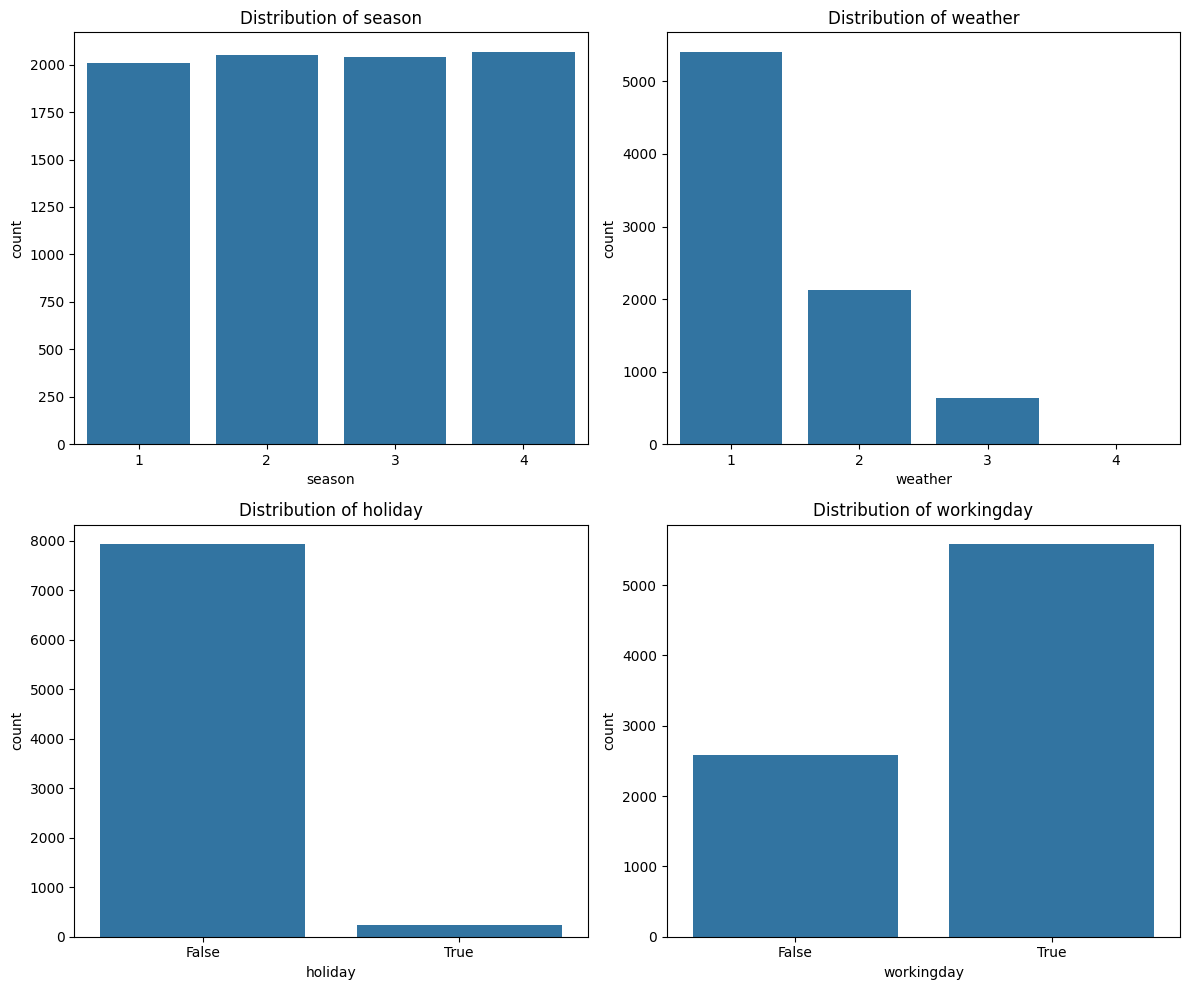

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

boolean_features = [col for col in ['holiday', 'workingday'] if col in train_data.columns]
categorical_features = [col for col in ['season', 'weather'] if col in train_data.columns]

# Plot categorical features
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=train_data, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Distribution of {feature}')

# Plot boolean features
for i, feature in enumerate(boolean_features):
  sns.countplot(x=feature, data=train_data, ax=axes[1, i])
  axes[1, i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()



From a first look, we can see that : <br>
The 'season' feature has comparable numbers of rental bikes for each season, indicating that the demand for bikes remains consistent throughout the year.

On the other hand, The 'wether' count plot indicates that they are no bikes rental during a '4' wether, which is a heavy weather.

In addition, we observed that people are often rent bikes during working days and not on a holiday.  

*Numerical Features Distribution*

Next, we want to observe some statistics to understand what data we have: <br>
(Note that we are only looking at the numerical features and boolean features - which are represented as numbers).

In [30]:
# Get the summary statistics of the features
print("\nSummary statistics of the features:")
train_data.describe()


Summary statistics of the features:


,temp,atemp,humidity,windspeed,pollution,sunlight,traffic
count,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000
mean,20.244980,23.670160,61.835130,12.791334,47.152120,20.245980,0.004986
std,7.796018,8.468725,19.255791,8.213914,72.882602,7.796018,0.006319
min,0.820000,0.760000,0.000000,0.000000,0.000304,0.821000,0.000000
25%,13.940000,16.665000,47.000000,7.001500,3.693188,13.941000,0.000000
50%,20.500000,24.240000,62.000000,12.998000,17.684113,20.501000,0.000242
75%,26.240000,31.060000,77.000000,16.997900,59.257746,26.241000,0.004489
max,41.000000,45.455000,100.000000,56.996900,754.304876,41.001000,0.015615


`TODO: Maybe delete this text?`

By looking at count, mean, standard deviations, minimum, maximum and data percentiles values we can learn about distributions, missing values and marginal values. <br><br>

<b>Count:</b> The count for each feature indicates the number of non-null values. No missing values exist in the numeric features (8164).<br><br>
<b>Mean:</b> The mean provides the average value for each feature. It can give us an idea of the central tendency of the data.<br><br>
<b>Standard Deviation (std): </b>The standard deviation measures the dispersion or spread of the data. A higher standard deviation indicates greater variability in the values of the feature.<br><br>
<b>Min and Max:</b> The minimum and maximum values represent the range of values observed in each feature. We can see the minimum and maximum values for each feature, which can help us understand the scale and magnitude of the data.<br><br>
<b>Percentiles (25%, 50%, 75%):</b> The percentiles provide information about the distribution of the data. The 25th, 50th (median), and 75th percentiles divide the data into quartiles. These values can give us insights into the distribution's skewness and the concentration of values around the median.

Based on this information, we can make the following observations: (Generated by GPT)

Here are some conclusions and observations that can be drawn from the train_data dataframe based on the provided statistics:

- <u>Temperature and Apparent Temperature (atemp):</u>

    The mean temperature is around 20.24°C, with a standard deviation of 7.80°C.
    Apparent temperature (atemp) has a similar distribution to temperature.


- <u>Humidity:</u>

    The average humidity is approximately 61.84%, with a standard deviation of 19.26%.
    The minimum humidity is 0%, which might be an outlier or missing data.


- <u>Windspeed:</u>

    The average windspeed is 12.79, with a standard deviation of 8.21.
    There is a wide range of windspeed values, with a minimum of 0 and a maximum of 56.9979.


- <u>Pollution:</u>

    The pollution level has a mean of 47.15, but with a high standard deviation of 72.88.
    The pollution values range from a minimum of 0.000304 to a maximum of 754.30, suggesting potential outliers.


- <u>Sunlight:</u>

    The average sunlight is 20.25, with a standard deviation of 7.80.
    Sunlight values range from a minimum of 0.821 to a maximum of 41.001.


- <u>Traffic:</u>

    The traffic variable has a very low mean of 0.00499, with a standard deviation of 0.00632.
    The majority of the values seem to be close to zero, suggesting sparse traffic data. Its impact on the bicycle rental demand needs exploration.

Now we would like to understand how the features are structured. <br>
Are the values in each feature repeated ...? What are common values in every feature ...? Is an attribute a representative attribute with different values ...?

In [31]:
for column in train_data.columns:
    categories = train_data[column].value_counts()
    print(f"Categories in column '{column}':")
    display(categories)
    # Noting when the categories are unique.
    if len(categories) == train_data.shape[0]:
        print("Each category is different.")
        print("")

Categories in column 'datetime':


2011-07-11 00:00:00    1
2012-05-10 23:00:00    1
2012-09-11 12:00:00    1
2011-01-17 14:00:00    1
2012-11-06 04:00:00    1
                      ..
2011-07-12 11:00:00    1
2011-10-12 00:00:00    1
2012-01-04 07:00:00    1
2012-04-13 22:00:00    1
2012-05-02 07:00:00    1
Name: datetime, Length: 8164, dtype: int64

Each category is different.

Categories in column 'season':


4    2067
2    2051
3    2039
1    2007
Name: season, dtype: int64

Categories in column 'holiday':


False    7924
True      240
Name: holiday, dtype: Int64

Categories in column 'workingday':


True     5578
False    2586
Name: workingday, dtype: Int64

Categories in column 'weather':


1    5406
2    2125
3     632
4       1
Name: weather, dtype: int64

Categories in column 'temp':


14.76    351
26.24    344
18.86    317
28.70    313
13.94    308
22.14    308
22.96    304
12.30    300
24.60    300
27.06    297
25.42    295
16.40    286
29.52    270
13.12    270
21.32    266
17.22    265
10.66    259
20.50    252
18.04    241
30.34    218
9.84     209
15.58    181
9.02     180
31.16    176
8.20     169
27.88    168
32.80    146
23.78    146
11.48    140
19.68    131
6.56     109
33.62     97
5.74      87
7.38      77
31.98     75
35.26     60
34.44     58
4.92      41
36.90     37
4.10      34
37.72     27
36.08     21
3.28       9
38.54      7
0.82       6
39.36      5
2.46       2
1.64       1
41.00      1
Name: temp, dtype: int64

Categories in column 'atemp':


31.060    506
25.760    325
22.725    317
26.515    304
16.665    292
20.455    286
25.000    269
21.210    265
33.335    261
30.305    256
15.150    256
24.240    252
21.970    241
17.425    232
31.820    228
34.850    217
14.395    207
27.275    205
32.575    204
29.545    204
11.365    194
15.910    191
13.635    189
12.880    183
19.695    181
34.090    160
12.120    157
23.485    131
28.790    125
10.605    119
35.605    118
9.850      98
18.180     94
36.365     93
37.120     92
9.090      78
37.880     75
28.030     59
7.575      59
38.635     55
6.060      49
39.395     46
6.820      46
8.335      41
40.910     34
18.940     33
40.150     31
5.305      20
42.425     20
41.665     18
3.790      11
4.545       8
3.030       6
2.275       6
43.180      6
43.940      6
44.695      2
45.455      1
1.515       1
0.760       1
Name: atemp, dtype: int64

Categories in column 'humidity':


88.0    292
94.0    238
83.0    227
87.0    215
65.0    197
       ... 
13.0      1
97.0      1
10.0      1
12.0      1
14.0      1
Name: humidity, Length: 87, dtype: int64

Categories in column 'windspeed':


0.0000     1000
11.0014     819
8.9981      816
12.9980     783
7.0015      753
15.0013     693
6.0032      675
16.9979     632
19.0012     504
19.9995     359
22.0028     283
23.9994     200
26.0027     174
27.9993     148
30.0026      81
31.0009      69
32.9975      59
35.0008      46
39.0007      21
36.9974      19
40.9973       9
43.9989       7
43.0006       7
56.9969       2
47.9988       2
50.0021       1
46.0022       1
51.9987       1
Name: windspeed, dtype: int64

Categories in column 'pollution':


5.354100     1
37.984932    1
12.358278    1
13.664858    1
0.092407     1
            ..
51.134165    1
5.178513     1
3.214959     1
21.849634    1
81.965417    1
Name: pollution, Length: 8164, dtype: int64

Each category is different.

Categories in column 'sunlight':


14.761    351
26.241    344
18.861    317
28.701    313
13.941    308
22.141    308
22.961    304
12.301    300
24.601    300
27.061    297
25.421    295
16.401    286
29.521    270
13.121    270
21.321    266
17.221    265
10.661    259
20.501    252
18.041    241
30.341    218
9.841     209
15.581    181
9.021     180
31.161    176
8.201     169
27.881    168
32.801    146
23.781    146
11.481    140
19.681    131
6.561     109
33.621     97
5.741      87
7.381      77
31.981     75
35.261     60
34.441     58
4.921      41
36.901     37
4.101      34
37.721     27
36.081     21
3.281       9
38.541      7
0.821       6
39.361      5
2.461       2
1.641       1
41.001      1
Name: sunlight, dtype: int64

Categories in column 'traffic':


0.000000    2090
0.000242    2088
0.015615    2005
0.004489    1981
Name: traffic, dtype: int64

We can draw some interesting conclusions: (Generated by GPT)

- <u>Datetime:</u>

    Each timestamp in the 'datetime' column is unique, indicating that there are no duplicated timestamp values. This column might represent the date and time information.


- <u>Season:</u>

    There are four distinct categories in the 'season' column (1, 2, 3, 4) with varying counts.
    The distribution suggests that each season is well-represented in the dataset.


- <u>Holiday and Workingday:</u>

    The 'holiday' column has two categories (0, 1) with the majority being non-holiday days (0).
    The 'workingday' column has two categories (0, 1), with a higher count for working days (1).


- <u>Weather:</u>

    The 'weather' column has four categories (1, 2, 3, 4), with the majority falling under category 1.
    Category 4 appears to have only one occurrence and might be an outlier or error.


- <u>Temperature and Apparent Temperature (temp, atemp):</u>

    Both 'temp' and 'atemp' columns have a wide range of values, with multiple occurrences for each temperature.
    These features appear to have been discretized or rounded, resulting in multiple instances of the same temperature.


- <u>Humidity:</u>

    The 'humidity' column has 87 unique values, indicating a diverse range of humidity levels in the dataset.


- <u>Windspeed:</u>

    The 'windspeed' column has 29 unique values, with a dominant occurrence of 0.0000.
    It's possible that the windspeed values have been discretized, and 0.0000 might represent calm or very low windspeed.


- <u>Pollution:</u>

    Each value in the 'pollution' column is unique, indicating a diverse range of pollution levels.
    This feature appears to be continuous and might require further investigation for outliers.


- <u>Sunlight:</u>

    Similar to 'temp' and 'atemp', the 'sunlight' column has a variety of values with multiple occurrences for each sunlight level.


- <u>Traffic:</u>

    The 'traffic' column has four distinct values, with the majority being either 0.000000 or 0.000242.
    This variable might represent traffic intensity, and the low values suggest sparse traffic data.

Let's take a look on the distribution of the numerical features to draw some conclusions:

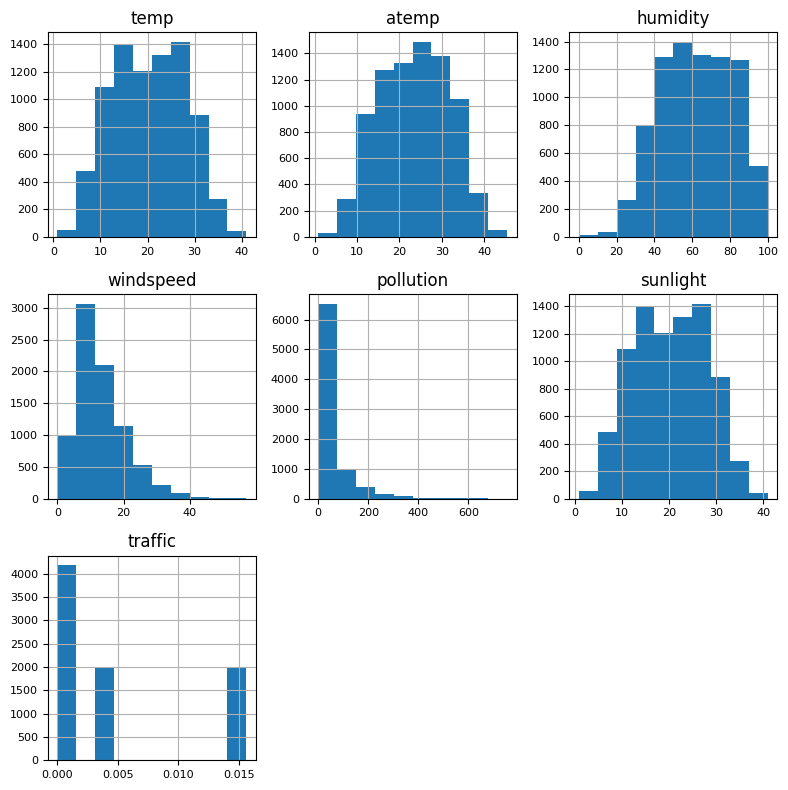

In [32]:
plt.figure(figsize=(8, 8))
plt.rc('axes', labelsize=4)  # Adjust label font size
plt.rc('xtick', labelsize=8)  # Adjust x-axis tick font size
plt.rc('ytick', labelsize=8)  # Adjust y-axis tick font size
plt.rc('legend', fontsize=8)  # Adjust legend font size

train_data_subset = train_data.drop(columns=['datetime'])

# Plot histograms
train_data_subset.hist(ax=plt.gca())
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Seems that there might be some outliers in "windspeed" and "pollution" as stated above.

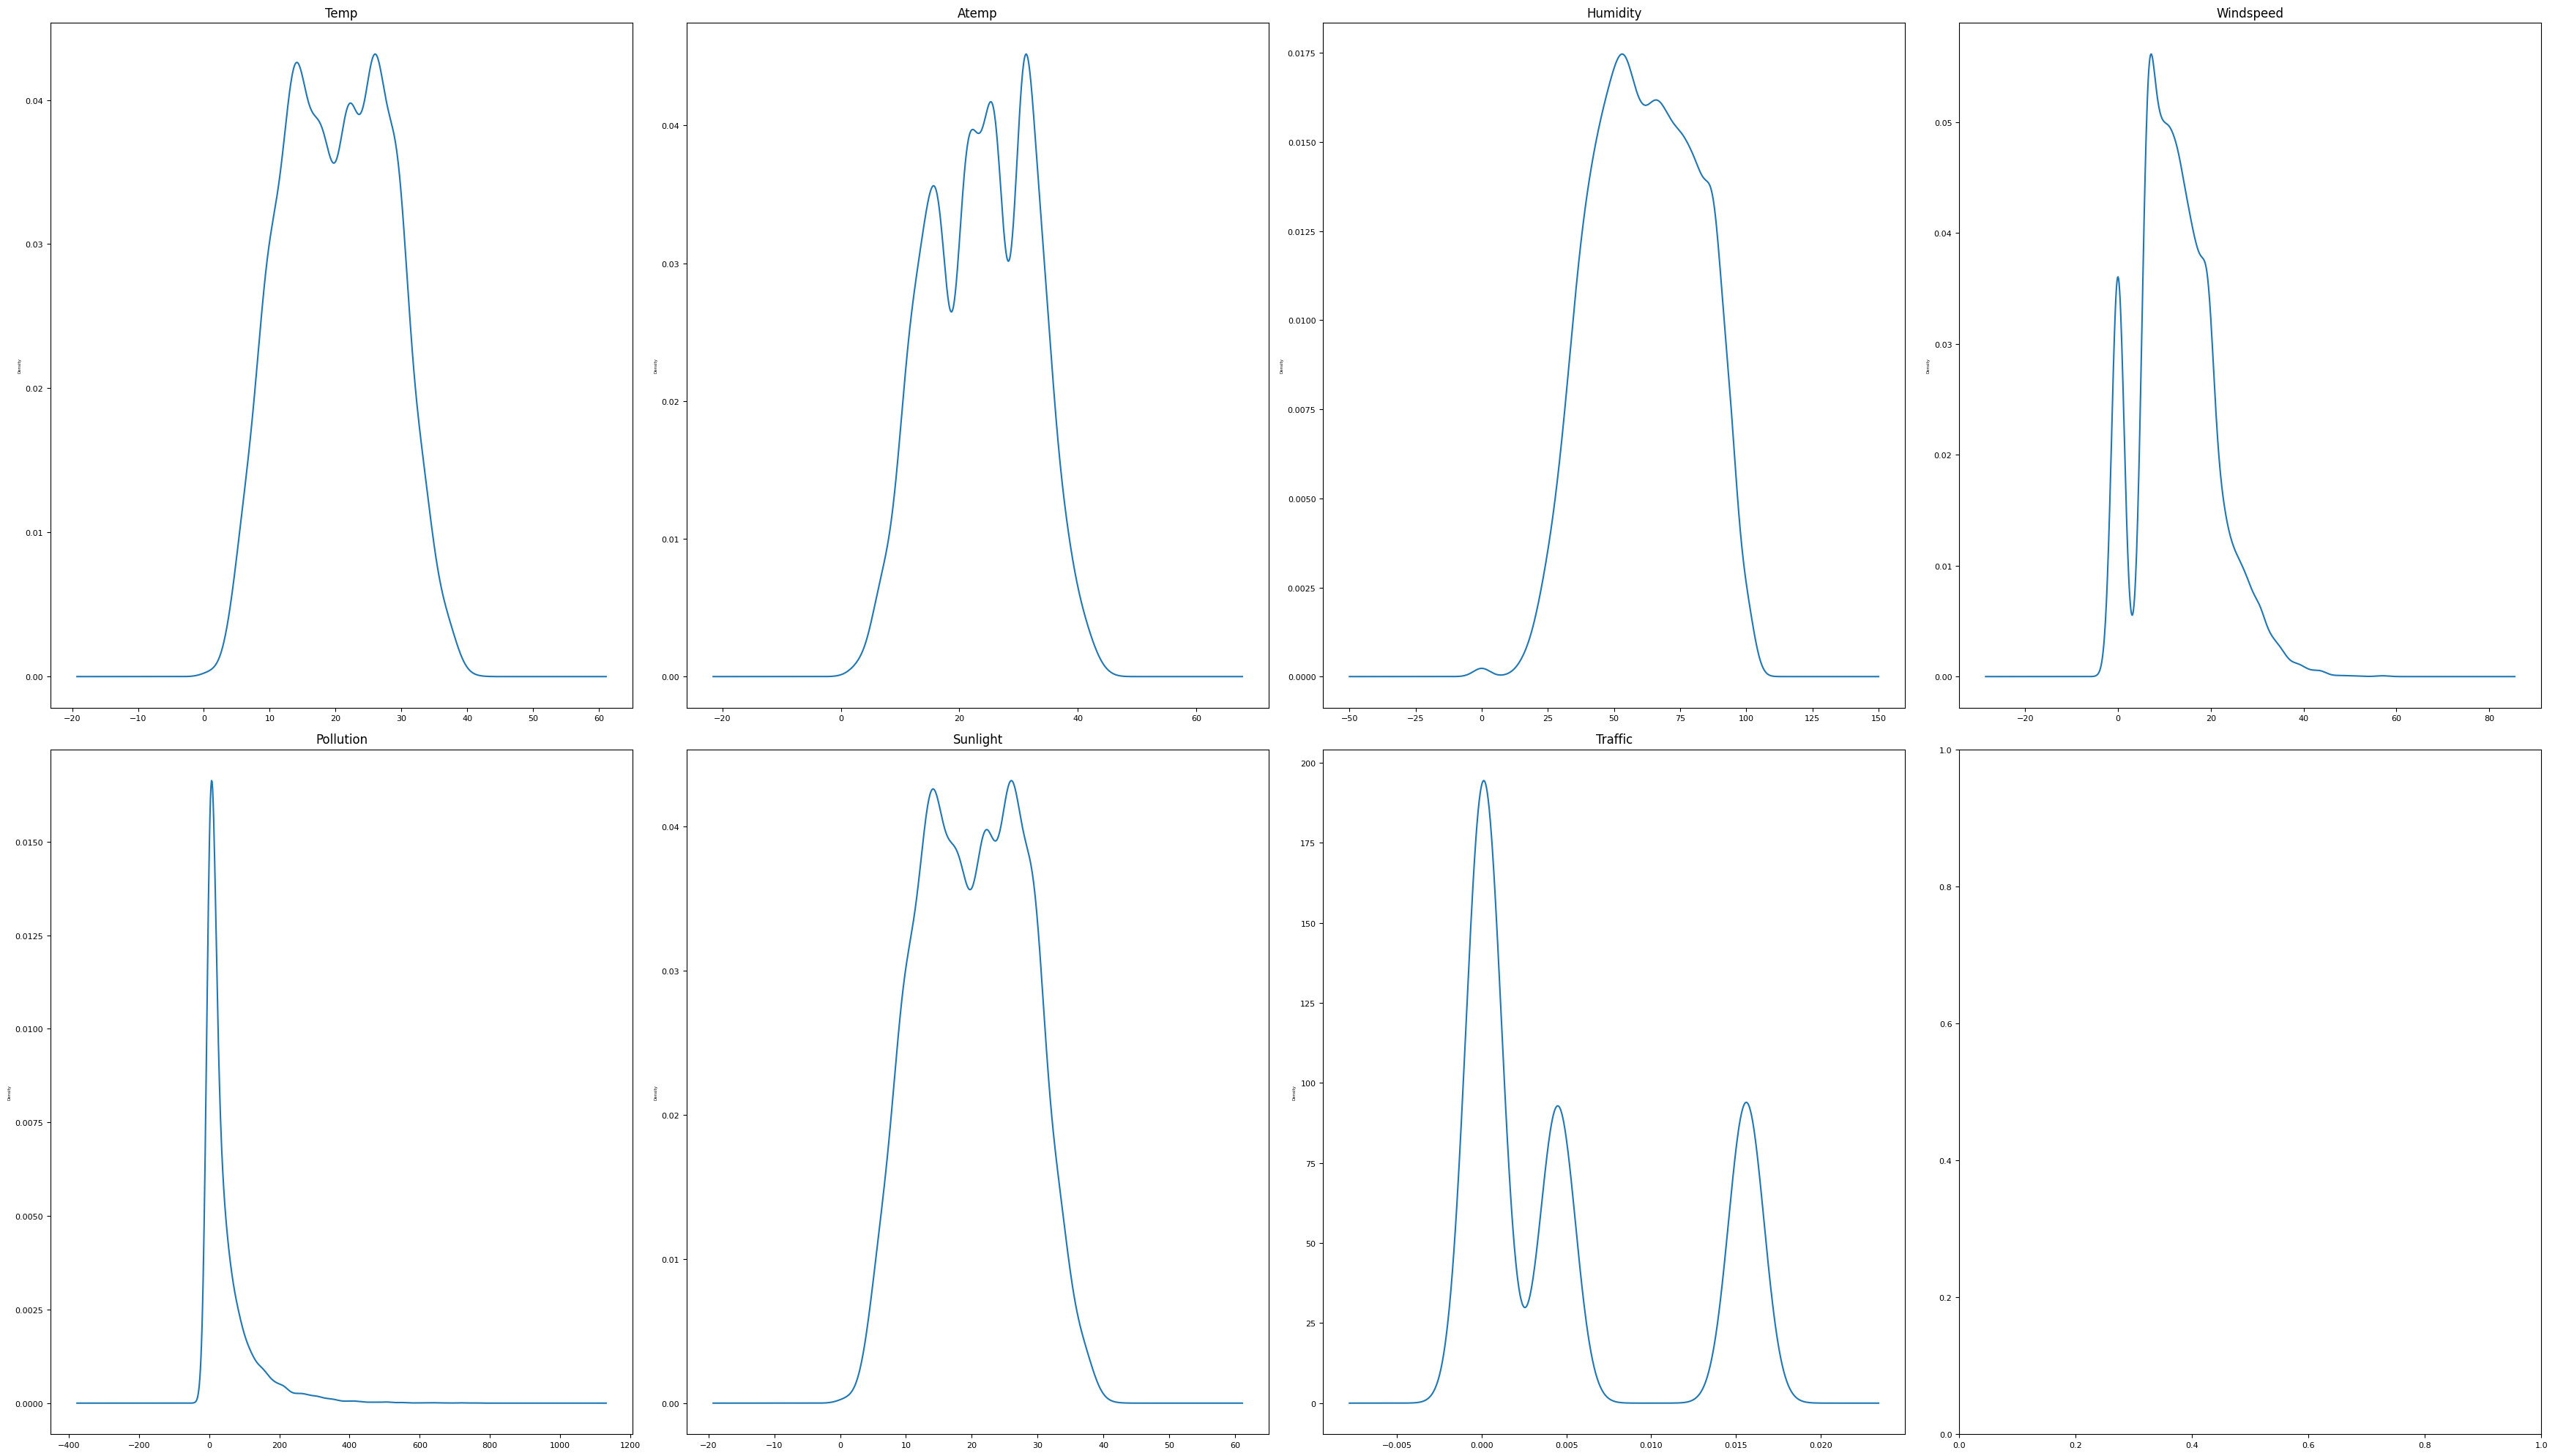

In [33]:
def create_distribution_graph(df):
    numeric_cols = df.select_dtypes(include=[float, int]).columns
    num_cols = len(numeric_cols)
    rows = int(math.sqrt(num_cols))
    cols = int(math.ceil(num_cols / rows))

    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(35, 20))

    plot_index = 0
    for i in range(rows):
        for j in range(cols):
            if plot_index < num_cols:
                col = numeric_cols[plot_index]
                df[col].plot.density(ax=axes[i, j])
                axes[i, j].set_title(col.capitalize())
                plot_index += 1

    plt.tight_layout()
    plt.show()

create_distribution_graph(train_data)

"Humidity" and "Pollution" show some type of normality, maybe after some tweaking a better conclusion could be drawn.

We will deal with outliers later.<br>
Hence, let's apply log transformation on these features:

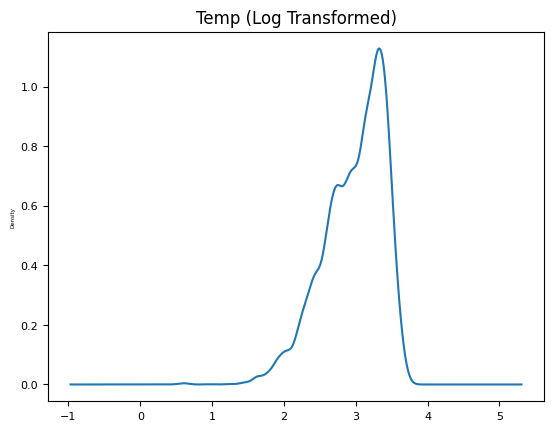

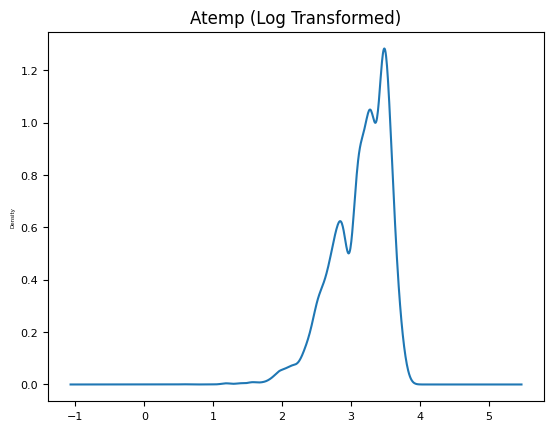

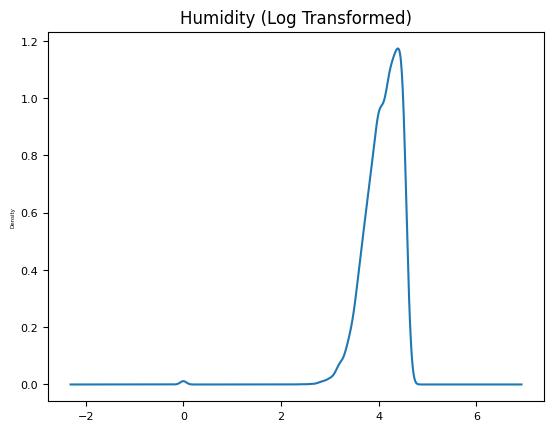

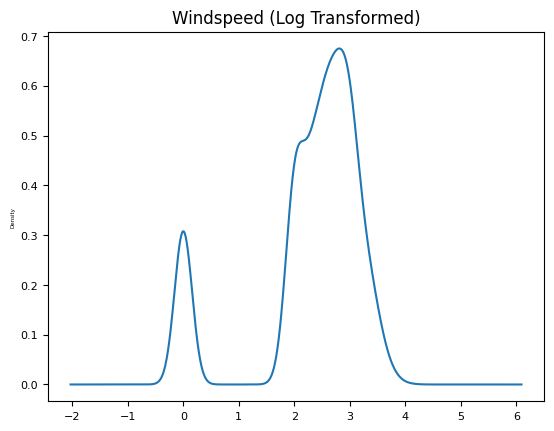

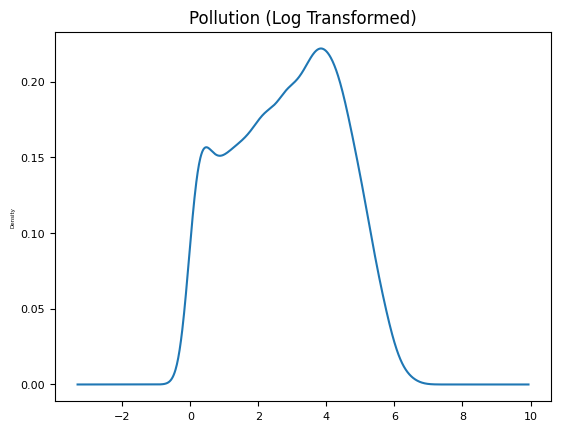

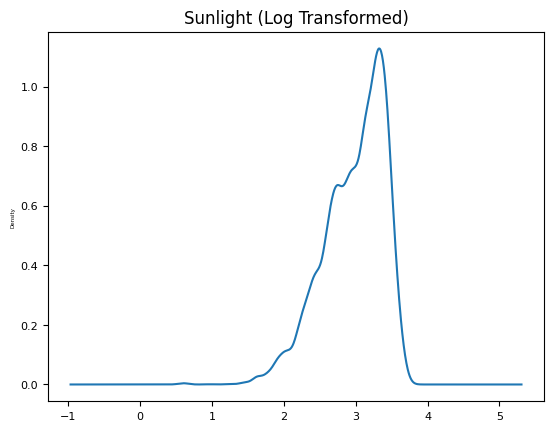

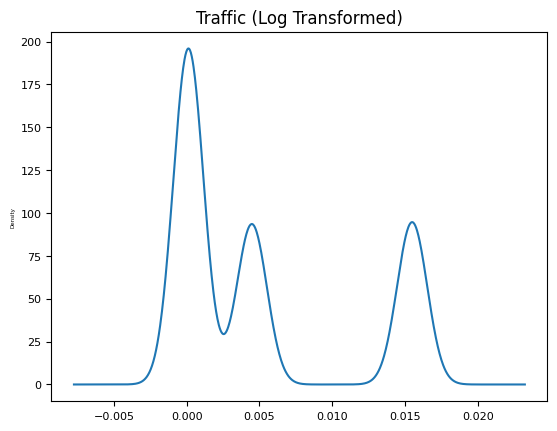

In [34]:
# Function that creates a distribution graph for all the numeric features
def create_distribution_graph(df):
    for i, col in enumerate(df.select_dtypes(include=[float, int])):
        transformed_data = np.log1p(df[col])  # Apply logarithm transformation
        transformed_data.plot.density()
        plt.title(col.capitalize() + " (Log Transformed)")
        plt.show()

create_distribution_graph(train_data)

Seems like only "Humidity" looks like normaly distributed, but later we will take another look at the distributions and outliers.

#### Correlation
We want to check the correaltion between features.

Let's take a look in general. <br>
In this part we will use a new method which was not learnt in class- the VIF method.
We want primarily observe whether a feature has a high correlation with other features based on its Variance Inflation Factor (VIF) value.<br>
A high VIF value indicates multicollinearity, which suggests a strong correlation between the feature and other features in the dataset.

In [35]:
# Select numerical features (excluding the categorical features)
numerical_features = train_data.select_dtypes(include=['float64', 'bool'])

# Convert boolean features to numeric (0 and 1)
boolean_features = numerical_features.select_dtypes(include='bool')
boolean_features = numerical_features.dropna()
numerical_features[boolean_features.columns] = boolean_features.astype(int)

# Remove any rows with null values in the selected features
numerical_features = numerical_features.dropna()

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Variable"] = numerical_features.columns
vif["VIF"] = [variance_inflation_factor(numerical_features.values.astype(float), i) for i in range(numerical_features.shape[1])]

print("VIF for all features except category features:")
print(vif)

VIF for all features except category features:
     Variable         VIF
0     holiday    1.093512
1  workingday    3.142565
2        temp         inf
3       atemp  256.536128
4    humidity    6.189755
5   windspeed    2.765785
6   pollution    1.528149
7    sunlight         inf
8     traffic         NaN


To calculate the VIF, we regress each predictor variable against all the other predictor variables in the model. The VIF for each variable is then computed as the ratio of the variance of the estimated regression coefficient to the variance of the coefficient if that variable was uncorrelated with the other predictors.

Features with VIF values close to 1 (around or below 1) indicate low multicollinearity. These features are relatively independent of each other when predicting the target variable.<br>
Examples: TODO.<br>

Features with VIF values between 1 and 5 are generally considered to have moderate multicollinearity. Although there might be some correlation, it is not severe.<br>
Examples: TODO.<br>

Features with VIF values above 5 suggest the presence of multicollinearity. These features have a strong correlation with other features in the dataset and may negatively impact the model's performance.<br>
Examples: TODO.
<br><br>
Based on this information, we can consider the VIF values to identify potential issues related to multicollinearity.<br>
 High VIF values indicate that certain features are highly correlated with others, which can affect the model's interpretability and stability.<br>
In such cases, we may consider removing or transforming the highly correlated features to mitigate multicollinearity and improve the model's performance.




However, the VIF values alone do not provide information about the specific pairwise correlations between features. <br>
To determine the exact correlations between features, we need to calculate the correlation matrix or pairwise correlation coefficients.

Therefore, we will make a correlation matrix:

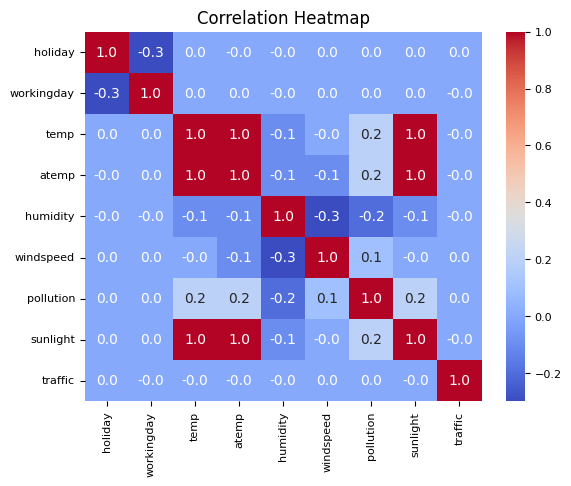

In [36]:
corr_matrix = train_data.corr().round(1)  # Round the correlation values to 1 decimal place
plt.figure()
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm')  # Set fmt='.1f' to display 1 decimal place
plt.title('Correlation Heatmap')
plt.show()

This function creates a visual representation of the correlation matrix using a color-coded heatmap.<br>
It displays a grid of squares, where each square represents the correlation between two features.

Here are some general observations we can make from the heatmap:

<b> Strong positive correlation:</b> If two features have a high positive correlation (TODO features), it suggests that as one feature increases, the other feature tends to increase as well. Conversely, if two features have a strong negative correlation (close to -1), it means that as one feature increases, the other feature tends to decrease.

<b>Weak or no correlation:</b> If the correlation coefficient is close to 0, it indicates a weak or no linear relationship between the features (TODO). This means that changes in one feature do not necessarily correspond to changes in the other feature.

<b>Redundant or highly correlated features:</b> High correlation values between pairs of features might indicate that these features provide similar information, in our case: TODO. In such cases, we could consider removing one of the redundant features to reduce dimensionality and potential multicollinearity.<br>
We will use these conclusions later in our analysis.

Let's take another look on the high correlated features:

In [37]:
# Extract the "numstrings" and "size" features from the train_data DataFrame

# TODO : Change based on the findings above

# numstrings = train_data['numstrings'] #TODO
# mz = train_data['MZ']
# size = train_data['size']

# # Plot a scatter plot of the two features
# plt.figure(figsize=(8, 6))
# plt.scatter(numstrings, size, alpha=0.5)
# plt.xlabel('numstrings')
# plt.ylabel('size')
# plt.title('Scatter Plot: numstrings vs size')
# plt.show()

# # Plot a scatter plot of the two features
# plt.figure(figsize=(8, 6))
# plt.scatter(mz, size, alpha=0.5)
# plt.xlabel('MZ')
# plt.ylabel('size')
# plt.title('Scatter Plot: MZ vs size')
# plt.show()


<b>A more in-depth analysis:</b> <br> TODO : Change based on the findings
- <b>numstrings and size</b>

    The "numstrings" feature represents the number of printable strings that are at least five printable characters long. <br>
    This can be an indicator of the amount of text or human-readable content present in the file. <br>
    Larger files are likely to have more text or content, which could explain the higher correlation between the file size and the number of strings.

    It is possible that larger files tend to have more printable strings, or vice versa.

    <b> The VIF values of both these features is high! <br>
    Moreover, looking on the plot, Most of the values are on the linear line.</b>

- <b>MZ and size</b>

    The "MZ" string is a signature commonly found in Windows executable files (PE files) that indicates the file is a Portable Executable format. <br>
    This format is typically used for Windows applications and executables. Therefore, it is expected to observe a higher frequency of the "MZ" string in larger files, as larger files often contain more complex and feature-rich applications.

    To gain a better understanding of the relationship between the "MZ" feature and the file size, <br> we can further investigate the distribution of file sizes for files with and without the "MZ" string.  <br>
    This will help determine if the correlation is significant and consistent across the dataset.

    <b>The VIF values of size is high but the VIF of MZ is low!<br>
    Moreover, looking on the plot, there are a lot of values that are not on the linear line.</b>

In conclusion, the VIF index helped us to understand in general whether there is a correlation for features.<br>
The correlation matrix looked linearly at whether there was a correlation between each 2 features.<br>
In both of these indices we saw that the TODO feature has a very high correlation.<br>
All in all, later, we will maybe consider dropping some of them to improve the model.

Correlation from another look:

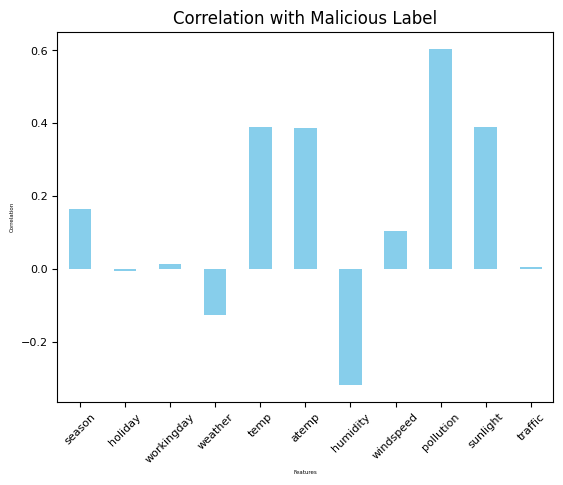

In [38]:
plt.figure()
correlation_matrix = train_with_labels.corr()
correlation_with_label = correlation_matrix['count']

# Remove the label feature from the correlation
correlation_with_label = correlation_with_label.drop('count')

correlation_with_label.plot(kind='bar', color='skyblue')
plt.title('Correlation with Malicious Label')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()


The resulting plot shows the correlation values between each feature and the 'label' column, providing insights into the relationship between the features and the malicious label. We can see that there is no feature that is very correlated with the labels.<br>
Can not draw any conclusion. TODO


### Visualizations of Null Values
In addition, we will look at the rows with missing values to try to learn what characterizes such rows:

In [39]:
nan_rows = train_data[train_data.isna().any(axis=1)]
print(nan_rows.shape[0])
nan_rows.head()

0


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic



Let's see what percentage of missing values exist in each feature.

In [40]:
def calculate_null_percentage(df):
    null_values = df.isnull().sum()
    null_columns = null_values[null_values > 0]

    null_columns_df = pd.DataFrame({
        "Feature": null_columns.index,
        "Null%": (null_columns / df.shape[0]) * 100
    })

    # Add features with 0 null values
    features_with_no_nulls = df.columns[df.isnull().sum() == 0]
    null_columns_df = pd.concat([null_columns_df, pd.DataFrame({"Feature": features_with_no_nulls, "Null%": 0})])
    null_columns_df.reset_index(drop=True, inplace=True)

    return null_columns_df
nulls = calculate_null_percentage(train_data)
nulls

,Feature,Null%
0,datetime,0.0
1,season,0.0
2,holiday,0.0
3,workingday,0.0
4,weather,0.0
5,temp,0.0
6,atemp,0.0
7,humidity,0.0
8,windspeed,0.0
9,pollution,0.0


### Visualisation Of Categorial Data

Except the 'sha256' feature, there are 2 another features of categorical features "C" and "file_type_trid" that are much clearer and easier to see as a graph: TODO

In [41]:
category_features = ['file_type_trid', 'C'] # TODO

for feature in category_features:
    # Create a horizontal bar plot
    if feature == 'C':
        plt.figure(figsize=(8, 4))
    if feature == 'file_type_trid':
        plt.figure(figsize=(40, 60))
    category_counts = train_data[feature].value_counts()
    category_counts.plot(kind='barh')
    plt.title(f'Frequency of {feature} Type Categories')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()


KeyError: 'file_type_trid'

<Figure size 4000x6000 with 0 Axes>

We can see that the 'file_type_trid" feature has a lot of different categories.<br>
Let's take another look. TODO

In [ ]:
def plot_categotical_col(df):

    plt.rcParams['figure.facecolor'] = 'white'
    plt.figure(figsize=(50, 20))
    # pie plot
    df['file_type_trid'].value_counts().plot(kind='pie', label='file_type_trid', autopct='%1.1f%%').set(
        title='Pie plot for each category of file_type_trid')
    plt.ylabel('')  # Remove the y-axis label
    plt.show()

plot_categotical_col(train_data)

We observe that the feature 'TODO' contains several categories with a relatively small proportion of the overall data (less than 5%).<br>
When these categories are encoded as dummy variables, they can significantly increase the dimensionality of the model, potentially leading to overfitting.
<br> We will address these issues later.


#### <u>Boolean Features:</u>

In [ ]:
# List of boolean features
boolean_features = ['has_debug', 'has_tls', 'has_relocations', 'has_resources', 'has_signature']

# Calculate the number of rows and columns for the subplots
num_features = len(boolean_features)
num_rows = (num_features + 1) // 2
num_cols = min(2, num_features)

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 4*num_rows))

# Flatten the axes if necessary
if num_features > 1:
    axes = axes.flatten()

# Iterate over each boolean feature
for i, feature in enumerate(boolean_features):
    # Group the data by the boolean feature and label, and calculate the count
    category_counts = train_with_labels.groupby([feature, 'label']).size().unstack()

    # Plot the results in the corresponding subplot
    ax = axes[i]
    ax.set_title(f'Label Distribution by {feature}')
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Count')
    category_counts.plot(kind='bar', stacked=True, ax=ax)
    ax.legend(['Benign', 'Malicious'])

# Hide empty subplots
for j in range(num_features, num_rows*num_cols):
    axes[j].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Several things can be learned from all these outputs: <br> TODO
<b>Category Imbalance:</b> By observing the height of the bars for each category, we can identify whether there is an imbalance in the dataset.<br>
If certain categories have significantly more instances than others, it could affect the performance of machine learning models trained on this data.<br>
In the feature "has_resources" the value 1 exists much more than the value 0.<br>
In the feature "has_signature" the value 0 exists much more than the value 1. <br>
In the feature "has_tls" the value 0 exists much more than the value 1.

<b>Label Distribution:</b> The plot also depicts the distribution of labels (benign and malicious) within each category.<br>
The stacked bars allow us to compare the proportion of benign and malicious instances for each category. <br>
<b>When the values in fields "has_debug" and "has_signature" are TRUE(1), there is a high chance that the file is benign.
It can be concluded from this that when the file has been debugged, or when there is a signature in the file, there are high chances that the file is benign.</b>
<br><br>


### Visualizations of Outliers:

In order to maybe identify potential outliers lets visualize, as a start, the boxplots of each non-categorial feature:

In [ ]:
train_data.plot(kind="box",subplots=True,layout=(6,3),figsize=(15,30));

TODO

But before getting to final conclusions, lets see the log-boxplots of these features:

In [ ]:
# Identify float-type features
float_features = train_data.select_dtypes(include=[np.float64, np.float32])

# Apply logarithmic transformation to float features
log_train_data = float_features.apply(np.log1p)

# Combine the transformed features with non-float features
transformed_train_data = train_data.copy()
transformed_train_data[float_features.columns] = log_train_data

# Plot the boxplots with logarithmic values
transformed_train_data.plot(kind="box", subplots=True, layout=(6, 3), figsize=(20, 40))
plt.show()

TODO

Final check for normality just to be sure:

In [ ]:

# Determine the number of rows and columns for the grid
num_rows = 2  # Number of rows in the grid
num_cols = 2  # Number of columns in the grid

log_train_data = log_train_data[['size', 'vsize', 'numstrings', 'printables']] # TODO

# log_train_data1 = train_data[['size', 'vsize', 'numstrings', 'printables']]

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each column in log_train_data
for i, column in enumerate(log_train_data.columns):
    # Create Q-Q plot
    stats.probplot(log_train_data[column], dist="norm", plot=axes[i])

    # Set plot title
    axes[i].set_title(f"Q-Q Plot for {column}")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


TODO

Creating functions to visualize outliers in several ways:

In [ ]:
def identify_bounds(df, feature, lower_percentile = 0.25, upper_percentile = 0.75, threshold=1.5):
    # Calculate the specified percentiles
    p1 = df[feature].quantile(lower_percentile)
    p2 = df[feature].quantile(upper_percentile)
    spread = p2 - p1

    # Define the upper and lower bounds
    lower_bound = p1 - threshold * spread
    upper_bound = p2 + threshold * spread

    # print(f"For {feature} the threshold given {threshold}, Lower Bound: '{lower_bound}', Upper Bound: '{upper_bound}'.")
    return lower_bound, upper_bound

In [ ]:
def visualize_outliers_histogram(df, feature, ax, lower_bound, upper_bound):
    # Plot histogram of the feature
    ax.hist(df[feature], bins=20)
    ax.set_title(f"Histogram of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")

    # Mark the outliers on the plot
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    ax.scatter(outliers[feature], np.zeros_like(outliers[feature]), color='red', marker='x', label='Outliers')

    ax.legend()

def visualize_outliers_scatter(df, feature, ax, lower_bound, upper_bound):
    # Identify the outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    # Visualize the outliers
    ax.scatter(df.index, df[feature], color='blue', label='Data')
    ax.scatter(outliers.index, outliers[feature], color='red', label='Outliers')
    ax.set_xlabel('Index')
    ax.set_ylabel(feature)
    ax.set_title(f'Outliers in {feature}')
    ax.legend()

def visualize_outliers_boxplot(df, feature, ax, lower_bound, upper_bound):
    # Create a boxplot of the feature
    sns.boxplot(data=df, y=feature, ax=ax, width=0.5)
    ax.set_xlabel(f'{feature}')
    ax.set_ylabel('Values')
    ax.set_title(f'Boxplot of {feature}')


def plot_grid_outliers(df, features, plotting_funcs):
    num_cols = len(features)
    num_funcs = len(plotting_funcs)
    rows = num_cols
    cols = num_funcs

    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 5 * rows))

    axes = axes.reshape(-1)  # Reshape axes to a 1D array

    for i, feature in enumerate(features):
        lower_bound, upper_bound = identify_bounds(df, feature)

        for j, plot_func in enumerate(plotting_funcs):

            ax = axes[i * num_funcs + j]  # Get the correct axis
            plot_func(df, feature, ax, lower_bound, upper_bound)

    fig.suptitle('Outlier view for the Normally Distributed Features\n\n', fontsize=16, wrap=True)
    # plt.figtext(0.5, 0.95, 'Outlier view for the Normally Distributed Features', ha='center', fontsize=16)
    plt.subplots_adjust(top=0.9)  # Adjust the top spacing
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_normal_dist_outliers(IQR_data):

    IQR_features = ['size', 'vsize', 'numstrings', 'printables', 'A']
    plotting_funcs = [visualize_outliers_histogram, visualize_outliers_scatter, visualize_outliers_boxplot]
    plot_grid_outliers(IQR_data, IQR_features, plotting_funcs)

In each row we plot one of the normally distributed features and mark the outliers

In [ ]:
IQR_train_data = pd.concat([log_train_data, train_data['A']], axis=1)
plot_normal_dist_outliers(IQR_train_data)

In the preprocessing section we will handle these as decided.

Not forgetting about the other non-normally distributed, we will handle their outliers using Isolation Forest algorithm in the preprocessing section as well.

In [ ]:

# Count plots for categorical features
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.countplot(x='season', data=train_data)

plt.subplot(2, 2, 2)
sns.countplot(x='holiday', data=train_data)

plt.subplot(2, 2, 3)
sns.countplot(x='workingday', data=train_data)

plt.subplot(2, 2, 4)
sns.countplot(x='weather', data=train_data)

plt.show()

In [ ]:
train_data

In [ ]:
train_data.dtypes

In [ ]:
# Line plot for bike rentals over time
plt.figure(figsize=(16, 6))
plt.plot(train_with_labels['datetime'], train_with_labels['count'])
plt.title('Bike Rentals Over Time')
plt.xlabel('Datetime')
plt.ylabel('Count')
plt.show()

In [ ]:
train_data.info

## Preprocessing

In [ ]:
full_train_data_copy = full_train_data.copy()

labels = full_train_data_copy['count']
data = full_train_data_copy.drop('count', axis=1)

# Train split to train and validation with fixed random state (42) to ensure reproducibility
train_data, validation_data, train_labels, validation_labels = train_test_split(data, labels, test_size=0.2, random_state = 42, shuffle = True)

# Save copies in order to have a clean data set to use in the final preprocessing function
# (when pipelining all the functions from start to end)
train_data_ppc = train_data.copy()
train_lables_ppc = train_labels.copy()

validation_data_ppc = validation_data.copy()
validation_labels_ppc = validation_labels.copy()

  ### Handling Missing Values


In [ ]:
# Example of a function implementation and call
def handle_corr_missing_values(train_data, test_data):
  pass


In [ ]:
train_data, validation_data = handle_corr_missing_values(train_data, validation_data)

In [ ]:
# Handle missing values function
def handle_missing_values(train_data, test_data):
    train_data, test_data = handle_corr_missing_values(train_data, test_data)
    train_data, test_data = handle_rest_missing_values(train_data, test_data)
    return train_data, test_data

### Add New Features

In [ ]:
def adding_new_feature(data):
    #....

    return data

In [ ]:
train_data = adding_new_feature(train_data)
validationv_data = adding_new_feature(validation_data)

In [ ]:
train_data.head()

In [ ]:
validation_data.head()

  ### Handling Categorial Features


In [ ]:
def handle_categorial_features(train_data, test_data):

    train_data, remaining_categories = reducing_category_types(train_data)
    test_data = apply_remaining_categories_for_test(test_data, remaining_categories)

    train_data = categorical_variables_spread(train_data)
    test_data = categorical_variables_spread(test_data)

    return train_data, test_data

In [ ]:
train_data, validation_data = handle_categorial_features(train_data, validation_data)

  ###  Outliers


**Boxplot Visualiztion** <br>
Finding outliers using Boxplot

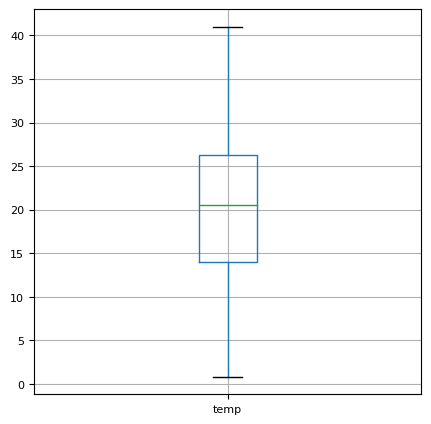

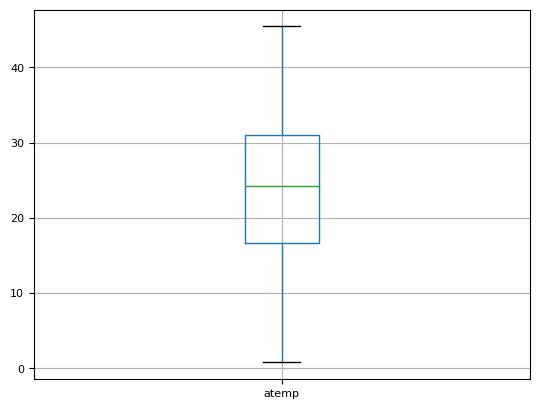

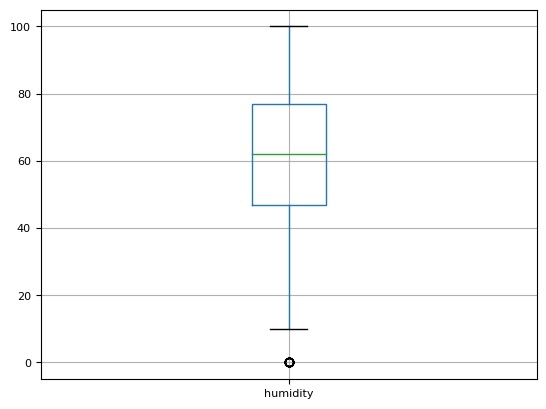

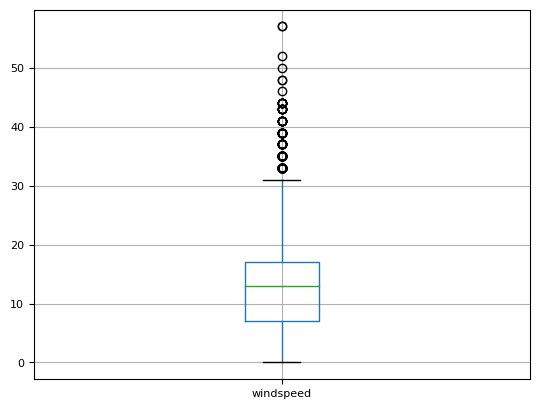

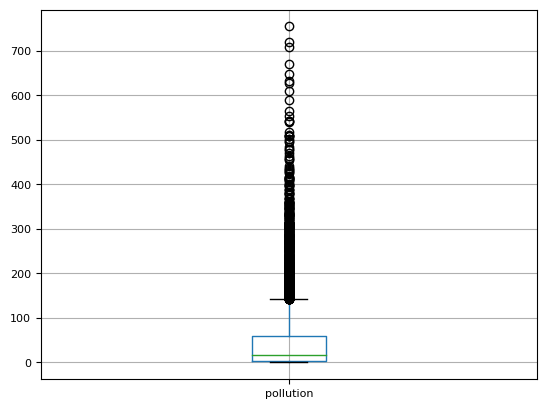

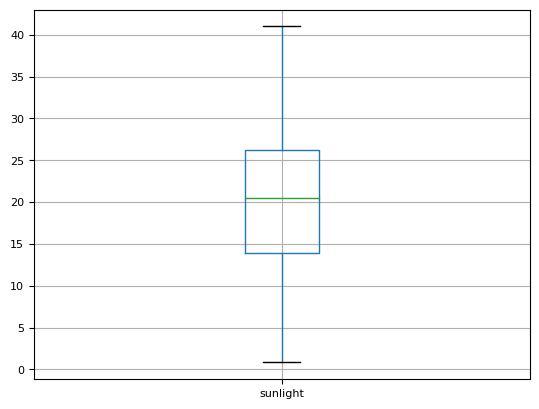

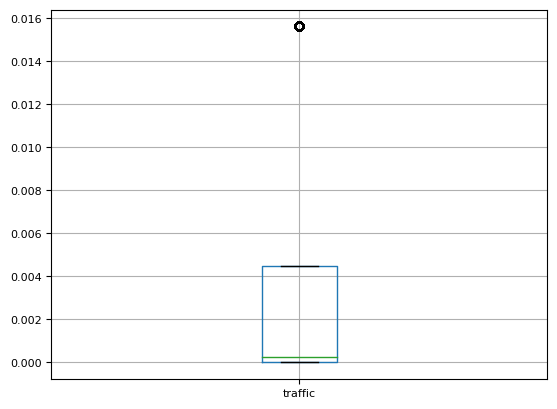

In [44]:
#lets use some boxplots, we want to see outliers of our features.
plt.figure(figsize=(5,5))
dataNumeric = train_data.select_dtypes(include = [float,int]).columns.tolist()
for col in dataNumeric:
    train_data[[col]].boxplot()
    plt.show()

In [ ]:
def handle_outliers(train_data, train_labels, test_data):

    train_data, bounds = handle_ND_outliers_train(train_data)
    test_data = handle_ND_outliers_test(test_data, bounds)

    contamination = 0.001
    threshold = 0.001
    train_data, train_labels = handle_NND_outliers_train(train_data, train_labels, threshold, contamination)

    return train_data, train_labels, test_data

In [ ]:
train_data, train_labels, validation_data = handle_outliers(train_data, train_labels, validation_data)

## should we handle outliers for our test data as well ?? - to check

  ### Large Dimensionality


##### `How will we recognize that the dimensions of the problem are too large?`

In order to assess as the dimensionality of the problem to a higher degree we can use the following steps:<br>

- Compute the Feature-to-Sample Ratio: Calculate the ratio of the number of features to the number of samples. If this ratio is significantly large, it might indicate a high-dimensional problem.

- Explore Feature Sparsity: Analyze the sparsity of our features. If a significant number of features have a high percentage of zero or near-zero values, it may indicate a high-dimensional problem.

- Assess Feature Redundancy: Determine the level of redundancy among the features. Redundant features provide similar or redundant information, which can increase dimensionality without adding valuable insights. (correlated features removal)

- Consider Feature Importance: Evaluate the importance or relevance of each feature in relation to the target variable (if available).

- Assess Computational Complexity: Take into account the computational resources and time required to handle high-dimensional data. Some algorithms may become computationally expensive or impractical to run with a large number of features.

- Evaluate Model Performance: Train and evaluate models using different subsets of features to assess their impact on model performance. If the performance remains consistent despite reducing the number of features, it may indicate high dimensionality.

  ### Data Normalizing


In [ ]:
def normalize_data(train_data, test_data):

    selected_features = ['size', 'vsize', 'numstrings', 'printables', 'A','imports', 'exports', 'symbols', 'paths', 'urls', 'registry', 'MZ', 'avlength', 'proportion_imports', 'file_type_prob_trid', 'B']

    train_data, scaler = normalize_data_train(train_data, selected_features)
    test_data = normalize_data_test(test_data, scaler, selected_features)

    return train_data, test_data

In [ ]:
train_data, validation_data = normalize_data(train_data, validation_data)

  ### Dimensionality Reduction

In [ ]:
def remove_features(data):
    features_to_remove = ['registry', 'size', 'MZ']
    data_selected = data.drop(features_to_remove, axis=1)
    return data_selected

In [ ]:
train_data = remove_features(train_data)
validation_data = remove_features(validation_data)

### Final Preprocessing Function

Now, after deciding what manipulations we will do on the train data (Outliers removal, Normalization, Missing values handling, Categorial data handling, Feature selection and Feature manipulation), we will create a generic preprocess function to run it all at once.

In [ ]:
def preprocess_data_ALL(train_data, train_labels, test_data):

    # Missing Values Handling
    train_data, test_data = handle_missing_values(train_data, test_data)

    # Add feature - 'proportion_imports'
    train_data = adding_new_feature(train_data)
    test_data = adding_new_feature(test_data)

    # Categorical Data Handling
    train_data, test_data = handle_categorial_features(train_data, test_data)

    # Outliers Removal
    train_data, train_labels, test_data = handle_outliers(train_data, train_labels, test_data)

    # Normalization
    train_data, test_data = normalize_data(train_data, test_data)

    # Feature Reduction
    train_data = remove_features(train_data)
    test_data = remove_features(test_data)

    # PCA
    # train_data, test_data = perform_pca(train_data, test_data, 0.99)

    return train_data, train_labels, test_data

In [ ]:
# Applying all the preprocessing decisions at once from start to end
preprocessed_train_data, preprocessed_train_labels, preprocessed_validation_data = preprocess_data_ALL(train_data_ppc, train_lables_ppc, validation_data_ppc)
preprocessed_validation_labels = test_labels_ppc.copy()

## Running the Models

## Evaluation of the Models

## Prediction



1.   List item
2.   List item



## *Output*

צריך למלא את זה לפי מה שיצא לנו!!!


In [ ]:
import pandas as pd
# Keep keys the same, and replace values according to your results and the specified type

results = {'model': ['string1', 'string2', 'string3'],
           'Score (RMSE)': ['string1', 'string2', 'string3'],
           'Hyperparams used': [['list1'], ['list2'], ['list3']],
           'Features dropped': [['list1'], ['list2'], ['list3']],
           'New features created': [['list1'], ['list2'], ['list3']],
           'Runtime trainining + inference (seconds)': ['int1', 'int2', 'int3'],
           'Hardware used (GPU/CPU/TPU)': ['string1', 'string2', 'string3'],
           'Explainability (top 3 features)': [['list1'], ['list2'], ['list3']]
           }

df = pd.DataFrame(results)
df

In [ ]:
df.to_csv(os.path.join(os.getcwd(), 'example.csv'))

In [ ]:
#בדיקת המודל

import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))